In [2]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# 2-3 Trees

In [3]:
import graphviz as gv

Ths notebook presents <a href="https://en.wikipedia.org/wiki/2-3_tree">2-3 trees</a>.  We define these trees inductively as follows:
  - $\texttt{Nil}$ is a 2-3 tree that represents the empty set.
  - $\texttt{Two}(l, k, r)$ is a 2-3 tree provided that
      - $l$ is a 2-3 tree,
      - $k$ is a key,
      - $r$ is a 2-3 tree,
      - all keys stored in $l$ are less than k and all keys stored in $r$ are bigger than $k$, that is we have
        $$ l < k < r. $$
      - $l$ and $r$ have the same height.
      A node of the form  $\texttt{Two}(l, k, r)$ is called a *2-node*.  Except for the fact
      that there is no value, a 2-node is
      interpreted in the same way as we have interpreted the term $\texttt{Node}(k, v, l, r)$.
  - $\texttt{Three}(l, k_l, m, k_r, r)$ is a 2-3 tree provided
      - $l$, $m$, and $r$ are 2-3 trees,
      - $k_l$ and $k_r$ are keys,
      - $l < k_l < m < k_r < r$,
      - $l$, $m$, and $r$ have the same height.
      A node of the form  $\texttt{Three}(l, k_l, m, k_r, r)$ is called a *3-node*. 

In order to keep 2-3 trees balanced when inserting new keys we use a fourth constructor of the form
$\texttt{Four}(l,k_1,m_l, k_2, m_r, k_3, r)$.
A term of the form $\texttt{Four}(l,k_1,m_l, k_2, m_r, k_3, r)$ is a *2-3-4 tree* iff
  - $l$, $m_l$, $m_r$, and $r$ are 2-3 trees,
  - $k_l$, $k_m$, and $k_r$ are keys,
  - $l < k_l < m_l < k_m < m_r < k_r < r$,
  - $l$, $m_l$, $m_r$, and $r$ all have the same height.
  
Nodes of this form are called *4-nodes* and the key $k_m$ is called the *middle key*.
Trees containing 2-nodes, 3-node, and 4-nodes are called *2-3-4 trees*.

In order to keep 2-3 trees balanced when deleting keys we use a fifth constructor of the form
$\texttt{One}(t)$.
A term of the form $\texttt{One}(t)$ is a *1-2-3 tree* iff $t$ is a 2-3 tree.

The class `TwoThreeTree` is a *superclass* for constructing the nodes of *2-3-4 trees*.  It has one static variable `sNodeCount`.  This variable is used to equip all nodes with a unique identifier.  This identifier is used to draw the trees using `graphviz`.

Every node has a uniques id `mID` that is stored as a member variable.  Furthermore, this class provides defaults for the functions `isNil`, `isTwo`, `isThree`, and `isFour`.  These functions can be used to check the type of a node.

In [4]:
class TwoThreeTree:
    sNodeCount = 0
    
    def __init__(self):
        TwoThreeTree.sNodeCount += 1
        self.mID = TwoThreeTree.sNodeCount
        
    def getID(self):
        return self.mID
        
    def isNil(self):
        return False
    
    def isOne(self):
        return False
    
    def isTwo(self):
        return False
    
    def isThree(self):
        return False
    
    def isFour(self):
        return False
    
    def isTree(self):
        return False
    
    def isMethod(self):
        return False
    
    def insert(self, k):
        return self._ins(k)._restore()._grow()
    
    def delete(self, k):
        return self._del(k)._repair()._shrink()
    
    def _grow(self):
        return self
    
    def _shrink(self):
        return self

The function `make_string` is a helper function used to shorten the implementation of `__str__`.
  - `obj` is the object that is to be rendered as a string
  - `attributes` is a list of those member variables that are used to produce the string

In [5]:
def _make_string(self, attributes):
        # map the function __str__ to all attributes and join them with a comma
        name = self.__class__.__name__
        return f"{name}({', '.join(map(str, [getattr(self, at) for at in attributes]))})"
    
TwoThreeTree._make_string = _make_string

The method $t.\texttt{toDot}()$ takes a 2-3-4 tree $t$ and returns a graph that depicts the tree $t$.

In [6]:
def toDot(self):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    self._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if t.isNil():
            dot.node(str(n), label='', shape='point')
        elif t.isOne():
            dot.node(str(n), label='', shape='point')
        elif t.isTwo():
            dot.node(str(n), label=str(t.mKey))
        elif t.isThree():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyR))
        elif t.isFour():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyM) + '|' + str(t.mKeyR))
        elif t.isTree():
            dot.node(str(n), label=str(t.mName), shape='triangle')
        else:
            assert False, f'Unknown node {t}'
    for n, t in nodeDict.items():
        if t.isOne():
            dot.edge(str(n), str(t.mChild.getID()))
        if t.isTwo():
            dot.edge(str(n), str(t.mLeft .getID()))
            dot.edge(str(n), str(t.mRight.getID()))
        if t.isThree():
            dot.edge(str(n), str(t.mLeft  .getID()))
            dot.edge(str(n), str(t.mMiddle.getID()))
            dot.edge(str(n), str(t.mRight .getID()))
        if t.isFour():
            dot.edge(str(n), str(t.mLeft   .getID()))
            dot.edge(str(n), str(t.mMiddleL.getID()))
            dot.edge(str(n), str(t.mMiddleR.getID()))
            dot.edge(str(n), str(t.mRight  .getID()))
    return dot

TwoThreeTree.toDot = toDot

The method $t.\texttt{collectIDs}(d)$ takes a tree $t$ and a dictionary $d$ and updates the dictionary so that the following holds:
$$ d[\texttt{id}] = n \quad \mbox{for every node $n$ in $t$.} $$
Here, $\texttt{id}$ is the unique identifier of the node $n$, i.e. $d$ associates the identifiers with the corresponding nodes.

In [7]:
def _collectIDs(self, nodeDict):
    nodeDict[self.getID()] = self
    if self.isOne():
        self.mChild._collectIDs(nodeDict)
    elif self.isTwo():
        self.mLeft ._collectIDs(nodeDict)
        self.mRight._collectIDs(nodeDict)
    elif self.isThree():
        self.mLeft  ._collectIDs(nodeDict)
        self.mMiddle._collectIDs(nodeDict)
        self.mRight ._collectIDs(nodeDict)
    elif self.isFour():
        self.mLeft   ._collectIDs(nodeDict)
        self.mMiddleL._collectIDs(nodeDict)
        self.mMiddleR._collectIDs(nodeDict)
        self.mRight  ._collectIDs(nodeDict)
        
TwoThreeTree._collectIDs = _collectIDs

The function $\texttt{toDotList}(\texttt{NodeList})$ takes a list of trees and displays them one by one.

In [8]:
def toDotList(NodeList):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    for node in NodeList:
        node._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if t.isNil():
            dot.node(str(n), label='', shape='point')
        elif t.isOne():
            dot.node(str(n), label='', shape='point')
        elif t.isTwo():
            dot.node(str(n), label=str(t.mKey))
        elif t.isThree():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyR))
        elif t.isFour():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyM) + '|' + str(t.mKeyR))
        elif t.isTree():
            dot.node(str(n), label=str(t.mName), shape='triangle', style='solid')
        elif t.isMethod():
            dot.node(str(n), label=str(t.mLabel), shape='rectangle', style='dotted')
        else:
            assert False, f'toDotList: Unknown node {str(t)}'
    for n, t in nodeDict.items():
        if t.isOne():
            dot.edge(str(n), str(t.mChild.getID()))
        if t.isTwo():
            dot.edge(str(n), str(t.mLeft .getID()))
            dot.edge(str(n), str(t.mRight.getID()))
        if t.isThree():
            dot.edge(str(n), str(t.mLeft  .getID()))
            dot.edge(str(n), str(t.mMiddle.getID()))
            dot.edge(str(n), str(t.mRight .getID()))
        if t.isFour():
            dot.edge(str(n), str(t.mLeft   .getID()))
            dot.edge(str(n), str(t.mMiddleL.getID()))
            dot.edge(str(n), str(t.mMiddleR.getID()))
            dot.edge(str(n), str(t.mRight  .getID()))
    return dot

The class `Tree` is not used in the implementation of *2-3 trees*.  It is only used for displaying abstract subtrees in equations.
It is displayed as a triangle containing the string that is stored in the member variable `mName`.

In [9]:
class Tree(TwoThreeTree):
    def __init__(self, name):
        TwoThreeTree.__init__(self)
        self.mName = name
        
    def __str__(self):
        return self.mName
    
    def isTree(self):
        return True

The class `Method` is not used in the implementation of 2-3 trees. It is only used for displaying method calls in equations. It is displayed as a rectangle containing the string that is stored in the member variable `mLabel`.

In [10]:
class Method(TwoThreeTree):
    def __init__(self, label):
        TwoThreeTree.__init__(self)
        self.mLabel = label
        
    def __str__(self):
        return self.mLabel
    
    def isMethod(self):
        return True

The class `Nil` represents an empty tree.  It has no member variables of its own.

In [11]:
class Nil(TwoThreeTree):
    def __init__(self):
        TwoThreeTree.__init__(self)
        
    def isNil(self):
        return True
    
    def __str__(self):
        return 'Nil()'

The class `One`represents a 1-node.  These are nodes without a key that have only a single child.

In [12]:
class One(TwoThreeTree):
    def __init__(self, child):
        TwoThreeTree.__init__(self)
        self.mChild = child
        
    def isOne(self):
        return True

    def __str__(self):
        return make_string(self, ['mChild'])

Graphically, the node $\texttt{One}(t)$ is represented as shown below:

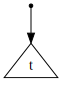

In [13]:
toDotList([One(Tree('t'))])

The class `Two` represents a 2-node of the form $\texttt{Two}(l, k, r)$.  It manages three member variables:
  - `mLeft`  is the left subtree $l$,
  - `mKey`   is the key that is stored at this node,
  - `mRight` is the right subtree $r$.

In [14]:
class Two(TwoThreeTree):
    def __init__(self, left, key, right):
        TwoThreeTree.__init__(self)
        self.mLeft  = left
        self.mKey   = key
        self.mRight = right
        
    def isTwo(self):
        return True

    def __str__(self):
        return self._make_string(['mLeft', 'mKey', 'mRight'])

Graphically, the node $\texttt{Two}(l, k, r)$ is represented as shown below:

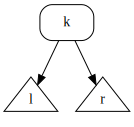

In [15]:
toDotList([Two(Tree('l'), 'k', Tree('r'))])

The class `Three` represents a 3-node of the form $\texttt{Three}(l, k_L, m, k_R, r)$.  It manages 5 member variables:
  - `mLeft`   is the left subtree $l$,
  - `mKeyL`   is the left key $k_L$,
  - `mMiddle` is the middle subtree $m$,
  - `mKeyR`   is the right key $k_r$,
  - `mRight`  is the right subtree.

In [16]:
class Three(TwoThreeTree):
    def __init__(self, left, keyL, middle, keyR, right):
        TwoThreeTree.__init__(self)
        self.mLeft   = left
        self.mKeyL   = keyL
        self.mMiddle = middle
        self.mKeyR   = keyR
        self.mRight  = right

    def __str__(self):
        return self._make_string(['mLeft', 'mKeyL', 'mMiddle', 'mKeyR', 'mRight'])        

    def isThree(self):
        return True

Graphically, the node $\texttt{Three}(l, k_L, m, k_R, r)$ is represented as shown below:

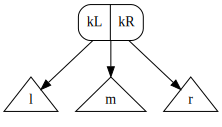

In [17]:
toDotList([Three(Tree('l'), 'kL', Tree('m'), 'kR', Tree('r'))])

The class `Four` represents a 4-node.  It manages 7 member variables:
  - `mLeft`    is the left subtree $l$,
  - `mKeyL`    is the left key $k_L$,
  - `mMiddleL` is the middle left subtree $m_L$,
  - `mKeyM`    is the middle key,
  - `mMiddleR` is the middle right subtree $m_R$,
  - `mKeyR`    is the right key $k_r$,
  - `mRight`   is the right subtree.

In [18]:
class Four(TwoThreeTree):
    def __init__(self, l, kl, ml, km, mr, kr, r):
        TwoThreeTree.__init__(self)
        self.mLeft    = l
        self.mKeyL    = kl
        self.mMiddleL = ml
        self.mKeyM    = km
        self.mMiddleR = mr
        self.mKeyR    = kr
        self.mRight   = r
        
    def __str__(self):
        return self._make_string(['mLeft', 'mKeyL', 'mMiddleL', 'mKeyM', 'mMiddleR', 'mKeyR', 'mRight'])
    
    def isFour(self):
        return True

Graphically, the node $\texttt{Four}(l, k_L, m_L, k_M, m_R, k_R, r)$ is represented as shown below:

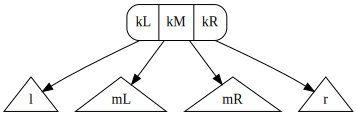

In [19]:
toDotList([Four(Tree('l'), 'kL', Tree('mL'), 'kM', Tree('mR'), 'kR', Tree('r'))])

## Methods of the Class `Nil`

The empty tree does not contain any keys:
$$ \texttt{Nil}.\texttt{member}(k) = \texttt{False} $$

In [20]:
def member(self, k):
    return False

Nil.member = member

Insertings a key $k$ into an empty node returns a 2-node with two empty subtrees.

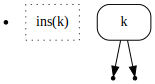

In [21]:
toDotList([Nil(), Method('ins(k)'), Two(Nil(), 'k', Nil())])

Mathematically, this can be written as follows:
$$ \texttt{Nil}.\texttt{ins}(k) = \texttt{Two}(\texttt{Nil}, k, \texttt{Nil}) $$
The implementation is straightforward as shown below.

In [22]:
def _ins(self, k):
    return "your code here"

Nil._ins = _ins

## Methods of the Class One

In [23]:
def _extract(self):
    return self.mChild

One._extract = _extract

## Methods of the Class Two

The method `extract` returns the member variables stored in a 2-node.  This is usefull to shorten the code since when we use this method, we don't have to prefix all variable names with `self.`.

In [24]:
def _extract(self):
    return self.mLeft, self.mKey, self.mRight

Two._extract = _extract

Given a 2-node $t$ and a key $k$, the method $t.\texttt{member}(k)$ checks whether the key $k$ occurs in $t$.  It is specified as follows:
  - $\texttt{Two}(l,k,r).\texttt{member}(k) = \texttt{True}$,
  - $k_1 < k_2 \rightarrow \texttt{Two}(l,k_1,r).\texttt{member}(k_2) = r.\texttt{member}(k_2)$,
  - $k_1 > k_2 \rightarrow \texttt{Two}(l,k_1,r).\texttt{member}(k_2) = l.\texttt{member}(k_2)$.

In [25]:
def member(self, key):
    l, k, r = self._extract()
    if k == key:
        return True
    elif key < k:
        return l.member(key)
    elif key > self.mKey:
        return r.member(key)

Two.member = member

The method $t.\texttt{ins}(k)$ takes a 2-3 tree $t$ and and a key $k$ and inserts the key $k$ into $t$.
It returns a 2-3-4 tree that has at most one 4-node, which has to be a child of the root
node.  The function $\texttt{ins}$ is recursive and uses the function $\texttt{restore}$ defined below. 

The most important invariant satisfied by the method call $t.\texttt{ins}(k)$ is the fact that the tree
$t.\texttt{ins}(k)$ has the same height as the tree $t$.

The different cases that need to be handled by `ins` are shown graphically below:

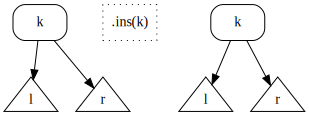

In [26]:
toDotList([Two(Tree('l'), 'k', Tree('r')), Method('.ins(k)'), Two(Tree('l'), 'k', Tree('r')) ])

  - $\displaystyle\texttt{Two}(l,k,r).\texttt{ins}(k) = \texttt{Two}(l,k,r)$

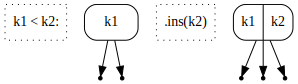

In [27]:
toDotList([Method('k1 < k2:'), Two(Nil(), 'k1', Nil()), Method('.ins(k2)'), Three(Nil(), 'k1', Nil(), 'k2', Nil()) ])

- $k_1 < k_2 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_1,\texttt{Nil},k_2,\texttt{Nil})$

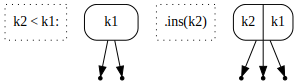

In [28]:
toDotList([Method('k2 < k1:'), Two(Nil(), 'k1', Nil()), Method('.ins(k2)'), Three(Nil(), 'k2', Nil(), 'k1', Nil()) ])

- $k_2 < k_1 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_2,\texttt{Nil},k_1,\texttt{Nil})$

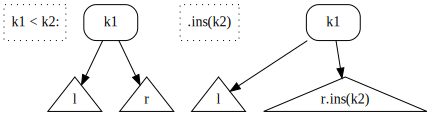

In [29]:
toDotList([Method('k1 < k2:'), Two(Tree('l'), 'k1', Tree('r')), Method('.ins(k2)'), Two(Tree('l'), 'k1', Tree('r.ins(k2)')) ])

- $k_1 < k_2 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l,k_1,r.\texttt{ins}(k_2)).\texttt{restore}()$

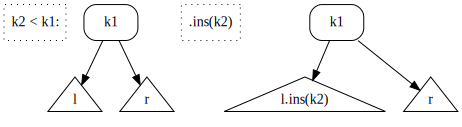

In [30]:
toDotList([Method('k2 < k1:'), Two(Tree('l'), 'k1', Tree('r')), Method('.ins(k2)'), Two(Tree('l.ins(k2)'), 'k1', Tree('r')) ])

- $k_2 < k_1 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l.\texttt{ins}(k_2),k_1,r).\texttt{restore}()$

I have collected all of these equations below:
  - $\texttt{Two}(l,k,r).\texttt{ins}(k) = \texttt{Two}(l,k,r)$
  - $k_1 < k_2 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_1,\texttt{Nil},k_2,\texttt{Nil})$
  - $k_2 < k_1 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_2,\texttt{Nil},k_1,\texttt{Nil})$
  - $k_1 < k_2 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l,k_1,r.\texttt{ins}(k_2)).\texttt{restore}()$
  - $k_2 < k_1 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l.\texttt{ins}(k_2),k_1,r).\texttt{restore}()$
  
Using these equations, the implementation of `ins` is straightforward.

In [ ]:
def _ins(self, key):
    "your code here"
    assert False, f'Unbalanced node {self}'
    
Two._ins = _ins

The function call $t.\texttt{restore}()$ takes a 2-3-4 tree $t$ that has at most one 4-node. This 4-node has to be a child
of the root.  It returns a 2-3-4 tree that has at most one 4-node.  This 4-node has to be the root node.
Graphically, it is specified as shown below.

In [ ]:
toDotList([Two(Four(Tree('l1'),'kl',Tree('ml'),'km', Tree('mr'),'kr',Tree('r1')), 'k', Tree('r')), 
           Method('.restore()'), 
           Three(Two(Tree('l1'),'kl',Tree('ml')), 'km', Two(Tree('mr'),'kr',Tree('r1')), 'k', Tree('r'))])

 - $\texttt{Two}\bigl(\texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1), k, r\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(\texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1), k, r\bigr) $

In [ ]:
toDotList([Two(Tree('l'), 'k', Four(Tree('l1'),'kl',Tree('ml'),'km', Tree('mr'),'kr',Tree('r1'))), 
           Method('.restore()'), 
           Three(Tree('l'), 'k', Two(Tree('l1'),'kl',Tree('ml')), 'km', Two(Tree('mr'),'kr',Tree('r1')))])

  - $\texttt{Two}\bigl(l, k, \texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1)\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(l, k, \texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1)\bigr) $

I have collected both equations below:
  - $\texttt{Two}\bigl(\texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1), k, r\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(\texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1), k, r\bigr) $,
  - $\texttt{Two}\bigl(l, k, \texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1)\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(l, k, \texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1)\bigr) $

If neither the left nor the right child node of a 2-node is a 4-node, the node is returned unchanged.  

In [ ]:
def _restore(self):
    "your code here"
    return self

Two._restore = _restore

## Methods of the Class `Three`

The method `extract` returns the member variables stored in a 3-node.

In [ ]:
def _extract(self):
    return self.mLeft, self.mKeyL, self.mMiddle, self.mKeyR, self.mRight

Three._extract = _extract

Given a 3-node $t$ and a key $k$, the method $t.\texttt{member}(k)$ checks whether the key $k$ occurs in $t$.  It is specified as follows:
  - $k = k_l \vee k = k_r \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = \texttt{True}$,
  - $k < k_l \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = l.\texttt{member}(k)$,
  - $k_l < k < k_r \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = m.\texttt{member}(k)$,
  - $k_r < k \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = r.\texttt{member}(k)$.

In [ ]:
def member(self, key):
    l, kL, m, kR, r = self._extract()
    if key == kL or key == kR:
        return True
    if key < kL:
        return l.member(key)
    if kL < key < kR:
        return m.member(key)
    if kR < key:
        return self.mRight.member(key)
    
Three.member = member

The method $t.\texttt{ins}(k)$ takes a 2-3 tree $t$ and and a key $k$ and inserts the key $k$ into $t$.
It returns a 2-3-4 tree that has at most one 4-node, which has to be a child of the root
node.  The function $\texttt{ins}$ is recursive and uses the function $\texttt{restore}$ defined below. 
It is defined as follows:
  - $k = k_l \vee k = k_r \rightarrow\texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}(l,k_l,m,k_r,r)$
  - $k < k_l \rightarrow \texttt{Three}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil}).\texttt{ins}(k) = 
                         \texttt{Four}(\texttt{Nil},k,\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil})$
  - $k_l < k < k_r \rightarrow \texttt{Three}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil}).\texttt{ins}(k) = 
                         \texttt{Four}(\texttt{Nil},k_l,\texttt{Nil},k,\texttt{Nil},k_r,\texttt{Nil})$
  - $k_r < k \rightarrow \texttt{Three}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil}).\texttt{ins}(k) = 
                         \texttt{Four}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil},k,\texttt{Nil})$
  
  - $k < k_l \wedge l \not= \texttt{Nil} \wedge m \not= \texttt{Nil}\wedge r \not= \texttt{Nil} \rightarrow 
     \texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}\bigl(l.\texttt{ins}(k),k_l,m,k_r,r\bigr).\texttt{restore}()$
  - $k_l < k < k_r \wedge l \not= \texttt{Nil} \wedge m \not= \texttt{Nil}\wedge r \not= \texttt{Nil} \rightarrow 
     \texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}\bigl(l,k_l,m.\texttt{ins}(k),k_r,r\bigr).\texttt{restore}()$
  - $k_r < k \wedge l \not= \texttt{Nil} \wedge m \not= \texttt{Nil}\wedge r \not= \texttt{Nil} \rightarrow 
     \texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}\bigl(l,k_l,m,k_r,r.\texttt{ins}(k)\bigr).\texttt{restore}()$

In [ ]:
def _ins(self, key):
    "your code here"
    assert False, f'Unbalanced node {self}'
    
Three._ins = _ins

The function call $t.\texttt{restore}()$ takes a 2-3-4 tree $t$ that has at most one 4-node. This 4-node has to be a child
of the root.  It returns a 2-3-4 tree that has at most one 4-node.  This 4-node has to be the root node.

The most important invariant satisfied by the method call $t.\texttt{ins}(k)$ is the fact that the tree
$t.\texttt{ins}(k)$ has the same height as the tree $t$.

The different cases that need to be handled by `ins` are shown graphically below:

In [ ]:
toDotList([Three(Four(Tree('l1'), 'k1', Tree('ml'), 'k2', Tree('mr'), 'k3', Tree('r1')), 'kl', Tree('m'), 'kr', Tree('r')),
           Method('.restore()'),
           Four(Two(Tree('l1'), 'k1', Tree('ml')), 'k2', Two(Tree('mr'), 'k3', Tree('r1')), 'kl', Tree('m'), 'kr', Tree('r')),
          ])

  - $\texttt{Three}\bigl(\texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_l, m, k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(\texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_l, m, k_r, r\bigr) $

In [ ]:
toDotList([Three(Tree('l'), 'kL', Four(Tree('l1'), 'k1', Tree('ml'), 'k2', Tree('mr'), 'k3', Tree('r1')), 'kR', Tree('r')),
           Method('.restore()'),
           Four(Tree('l'), 'kL', Two(Tree('l1'), 'k1', Tree('ml')), 'k2', Two(Tree('mr'), 'k3', Tree('r1')), 'kR', Tree('r'))
          ])

  - $\texttt{Three}\bigl(l, k_l, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_r, r\bigr) $

In [ ]:
toDotList([Three(Tree('l'), 'kl', Tree('m'), 'kr', Four(Tree('l1'), 'k1', Tree('ml'), 'k2', Tree('mr'), 'k3', Tree('r1'))),
           Method('.restore()'),
           Four(Tree('l'), 'kl', Tree('m'), 'kr', Two(Tree('l1'), 'k1', Tree('ml')), 'k2', Two(Tree('mr'), 'k3', Tree('r1')))
          ])

  - $\texttt{Three}\bigl(l, k_l, m, k_r, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1)\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, m, k_r, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1)\bigr) $

Below I have collected all the equations specifying the implementation of `restore` for 3-nodes.
  - $\texttt{Three}\bigl(\texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_l, m, k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(\texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_l, m, k_r, r\bigr) $
  - $\texttt{Three}\bigl(l, k_l, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_r, r\bigr) $
  - $\texttt{Three}\bigl(l, k_l, m, k_r, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1)\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, m, k_r, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1)\bigr) $
     
If neither of the child nodes of a 3-node is a 4-node, the node is returned unchanged.

In [ ]:
def _restore(self):
    "your code here"
    return self

Three._restore = _restore

## Methods of the Class `Four`

The method extract returns the member variables stored in a 4-node.

In [ ]:
def _extract(self):
    return self.mLeft, self.mKeyL, self.mMiddleL, self.mKeyM, self.mMiddleR, self.mKeyR, self.mRight 

Four._extract = _extract

The method `restore` returns a 4-node unchanged.

In [ ]:
def _restore(self):
    return self

Four._restore = _restore

The function `grow` turns a 4-node into 3 2-nodes.  Graphically, it is specified as follows:

In [ ]:
toDotList([Four(Tree('l'),'kl', Tree('ml'), 'km', Tree('mr'), 'kr', Tree('r')),
           Method('.grow()'),
           Two(Two(Tree('l'),'kl', Tree('ml')), 'km', Two(Tree('mr'), 'kr', Tree('r')))
          ])

  - $\texttt{Four}(l, k_l, m_l, k_m, m_r, k_r, r).\texttt{grow}() =  
     \texttt{Two}\bigl(\texttt{Two}(l, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r)\bigr)$

In [ ]:
def _grow(self):
    "your code here"
    
Four._grow = _grow

## Testing

In [ ]:
m = Nil()
m.isNil()
m.toDot()

In [ ]:
m = m.insert("anton")
m.toDot()

In [ ]:
m = m.insert("hugo" )
m.toDot()

In [ ]:
m = m.insert("gustav")
m.toDot()

In [ ]:
m = m.insert("jens")
m.toDot()

In [ ]:
m = m.insert("hubert")
m.toDot()

In [ ]:
m = m.insert("andre")
m.toDot()

In [ ]:
m = m.insert("philipp")
m.toDot()

In [ ]:
m = m.insert("rene")
m.toDot()

In [ ]:
m = m.insert("walter")
m.toDot()

Let's generate 2-3 tree with random keys.

In [ ]:
import random as rnd

In [ ]:
t = Nil()
for k in range(30):
    k = rnd.randrange(100)
    t = t.insert(k)
t.toDot()

Lets us try to create a tree by inserting sorted numbers because that resulted in linear complexity for ordered binary trees.

In [ ]:
M = Nil()
for k in range(30):
    M = M.insert(k)
M.toDot()

Finally, we compute the set of prime numbers $\leq 100$.  Mathematically, this set is given as follows:
$$ \bigl\{2, \cdots, 100 \bigr\} - \bigl\{ i \cdot j \bigm| i, j \in \{2, \cdots, 100 \}\bigr\}$$
First, we compute the set of products $\bigl\{ i \cdot j \bigm| i, j \in \{2, \cdots, 100 \}\bigr\}$.
Then, we insert all naturals numbers less than 100 that are not products into the set of primes.

In [ ]:
Products = Nil()    
for i in range(2, 101):
    for j in range(2, 101):
        Products = Products.insert(i * j)
        
Primes = Nil()
for k in range(2, 101):
    if not Products.member(k):
        Primes = Primes.insert(k)
Primes.toDot()